<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span><ul class="toc-item"><li><span><a href="#Dataset" data-toc-modified-id="Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Dataset</a></span></li><li><span><a href="#Import-libraries" data-toc-modified-id="Import-libraries-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Importation des  libraries</a></span></li></ul></li><li><span><a href="#Read-and-explore-data" data-toc-modified-id="Read-and-explore-data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Lire et exploerer les données</a></span></li><li><span><a href="#Data-pre-processing" data-toc-modified-id="Data-pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Prétraitement des données</a></span><ul class="toc-item"><li><span><a href="#Rename-columns" data-toc-modified-id="Rename-columns-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Renommage des données</a></span></li><li><span><a href="#Handle-missing-values" data-toc-modified-id="Handle-missing-values-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>remplacer les valeurs manquantes</a></span></li><li><span><a href="#Replace-outliers" data-toc-modified-id="Replace-outliers-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Remplacer les valeurs abérantes</a></span></li><li><span><a href="#Split-the-dataset-into-train-and-test-data" data-toc-modified-id="Split-the-dataset-into-train-and-test-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Séparation du jeu de données en test et train </a></span></li><li><span><a href="#Data-transformation" data-toc-modified-id="Data-transformation-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Transformation des données</a></span></li><span><a href="#Create-BiLSTM,-LSTM-and-GRU-model" data-toc-modified-id="Create-BiLSTM,-LSTM-and-GRU-model-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Créer les modèle BiLSTM, LSTM,GRU et LSTM-GRU</a></span><ul class="toc-item"><li><span><a href="#Fit-the-models" data-toc-modified-id="Fit-the-models-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Entarinner les modèles</a></span><ul class="toc-item"><li><span><a href="#Plot-train-loss-vs-validation-loss" data-toc-modified-id="Plot-train-loss-vs-validation-loss-4.1.1"><span class="toc-item-num">4.1.1&nbsp;&nbsp;</span>courbe de la fonction perte de test et de validation</a></span></li></ul></li><li><span><a href="#Inverse-target-variable-for-train-and-test-data" data-toc-modified-id="Inverse-target-variable-for-train-and-test-data-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>inverser la variable cibel pour une bonne prédiction</a></span></li></ul></li><li><span><a href="#Make-prediction-using-BiLSTM,-LSTM-and-GRU" data-toc-modified-id="Make-prediction-using-BiLSTM,-LSTM-and-GRU-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>prédiction utilisant le BiLSTM, LSTM,GRU et LSTM-GRU</a></span><ul class="toc-item"><li><span><a href="#Plot-true-future-vs-prediction" data-toc-modified-id="Plot-true-future-vs-prediction-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>courbe des valeur réel vs prédicte</a></span></li><li><span><a href="#Calculate-RMSE-and-MAE" data-toc-modified-id="Calculate-RMSE-and-MAE-5.2"><span class="toc-item-num">5.2&nbsp;&nbsp;</span>calcul de la RMSE et MAE</a></span></li></ul></li><li><span><a href="#Forecast-water-consumption-in-10-years" data-toc-modified-id="Forecast-water-consumption-in-10-years-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>prédiction sur un ans</a></span></li></ul></div>

# introduction
Dans ce notebook, je compare quatre réseaux neuronaux récurrents couramment utilisés : Long Short-Term Memory (LSTM), Gated Recurrent Unit (GRU),  Bidirectionnel LSTM (BiLSTM) et hybride (LSTM-GRU)en fonction de leurs performances en matière de prédiction des précipitations l'impact du changement climatique. Ensuite, j'utilise le meilleur modèle pour prévoir ces prédictions sur un ans.

## Jeu de données
La ville de Lille, En France, a été choisie comme site d'étude. La ville fait partie de la région du nord de la france, proche de Valenciennes.

Pour ce projet, les données sur la **précipitation** sont obtenues du 01/01/2013 au 31/12/2024. Pour la même période, la **température**, la **Vitesse du vent**, **humidité** **direction du vent** et **Rayonnement solaire**sont collectées. Les mesures de ces variables climatiques ont été effectuées par [power.larc.nasa.gov](https://power.larc.nasa.gov/data-access-viewer/).

## Importation des librairies

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px
import plotly.io as pio 
import plotly.graph_objects as go 
import math 
from datetime import timedelta 

from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error , mean_absolute_error 

import keras 
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 
from keras.callbacks import EarlyStopping 

# Lire et explorer les données
Lorsque j'importe les données à partir d'un fichier CSV, je m'assure que la colonne **Date** a le format *DateTime* correct en **parse_dates = ['Date']**.

Lorsque je travaille avec la date et l'heure, cela devient beaucoup plus facile si je définis la colonne **Date** comme index du dataframe.

In [6]:
df = pd.read_csv("lille.csv", parse_dates = True, index_col = "date", sep = ",")
df

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
date,,,,,,
2013-01-01,3.36,263.00,5.20,0.77,2.59,19.29
2013-01-01,2.66,251.44,4.73,0.75,0.59,16.38
2013-01-01,3.29,255.50,9.23,0.75,0.46,7.72
2013-01-01,2.37,269.50,8.05,0.75,0.35,5.95
2013-01-01,1.69,276.50,7.33,0.75,0.47,5.58
...,...,...,...,...,...,...
2024-01-01,3.69,246.25,4.40,-999.00,0.81,-999.00
2024-01-01,5.16,241.31,7.68,-999.00,7.92,-999.00
2024-01-01,-999.00,-999.00,-999.00,-999.00,-999.00,-999.00


In [7]:
# voir les information sur les type de données 
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4376 entries, 2013-01-01 to 2024-01-01
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   vitesse_vent         4376 non-null   float64
 1   direction_vent       4376 non-null   float64
 2   temperature          4376 non-null   float64
 3   humidite             4376 non-null   float64
 4   precipitation        4376 non-null   float64
 5   rayonnement_solaire  4376 non-null   float64
dtypes: float64(6)
memory usage: 239.3 KB


In [8]:
# anlayse des données
df.describe()

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
count,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000,4376.000000
mean,0.820329,189.181312,8.586970,-39.524079,-0.199164,16.709413
std,47.877908,94.044967,48.621719,196.433441,47.944104,211.606679
min,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000,-999.000000
25%,2.010000,150.530000,6.167500,0.620000,0.070000,19.480000
50%,2.820000,207.685000,10.900000,0.690000,0.520000,50.700000
75%,3.930000,244.137500,16.050000,0.730000,2.632500,88.715000
max,10.200000,354.190000,28.280000,0.840000,46.540000,157.340000


In [9]:
# calculer le quartile de tout les colonnes
df.quantile([0.25, 0.5, 0.75])

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
0.25,2.01,150.5300,6.1675,0.62,0.0700,19.480
0.50,2.82,207.6850,10.9000,0.69,0.5200,50.700
0.75,3.93,244.1375,16.0500,0.73,2.6325,88.715


## Remplacer les valeurs aberrantes
J'utilise des méthodes statistiques pour détecter les valeurs aberrantes. Les méthodes statistiques supposent une distribution normale des points de données. Par conséquent, les valeurs situées dans une région de faible probabilité sont considérées comme des valeurs aberrantes.

J'applique le concept de vraisemblance maximale dans les méthodes statistiques, ce qui signifie que les valeurs en dehors de la plage μ±2σ sont qualifiées de valeurs aberrantes. Notez que μ±2σ contient 95 % des données sous l'hypothèse d'une distribution normale.

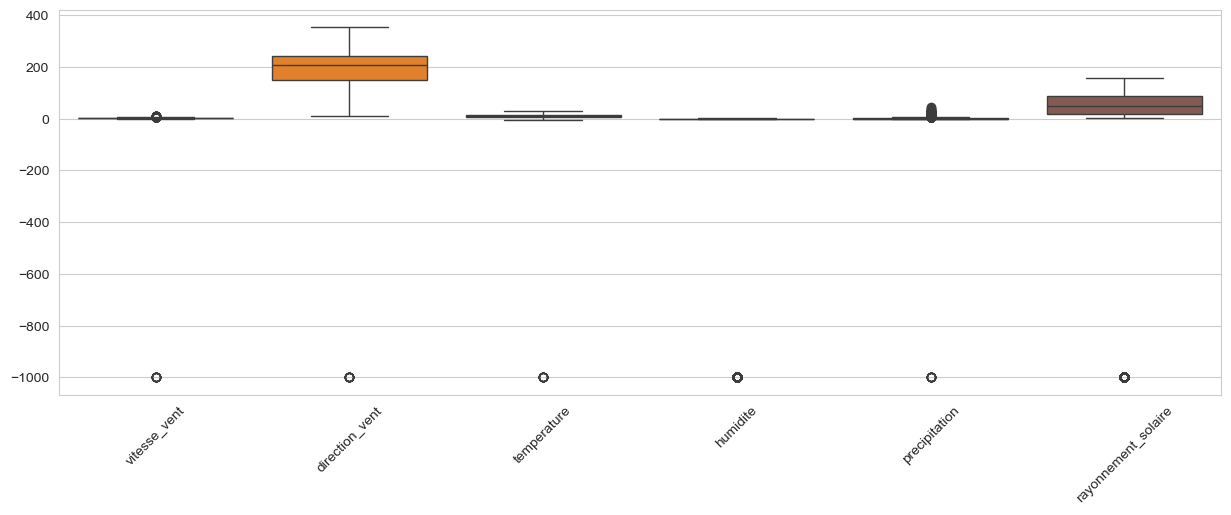

In [10]:
# faire un boxplot pour voir les outliers
plt.figure(figsize=(15, 5))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()


In [36]:
def replace_outliers(df, column):
    mean = df[column].mean()
    std = df[column].std()
    lower_bound = mean - 2 * std
    upper_bound = mean + 2 * std
    df[column] = np.where((df[column] < lower_bound) | (df[column] > upper_bound), mean, df[column])
    return df

# Appliquer la fonction replace_outliers sur la colonne "rayonnement_solaire"
df = replace_outliers(df, col)
df.head()

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
date,,,,,,
2013-01-01,3.36,263.00,5.20,0.77,2.59,19.29
2013-01-01,2.66,251.44,4.73,0.75,0.59,16.38
2013-01-01,3.29,255.50,9.23,0.75,0.46,7.72
2013-01-01,2.37,269.50,8.05,0.75,0.35,5.95
2013-01-01,1.69,276.50,7.33,0.75,0.47,5.58


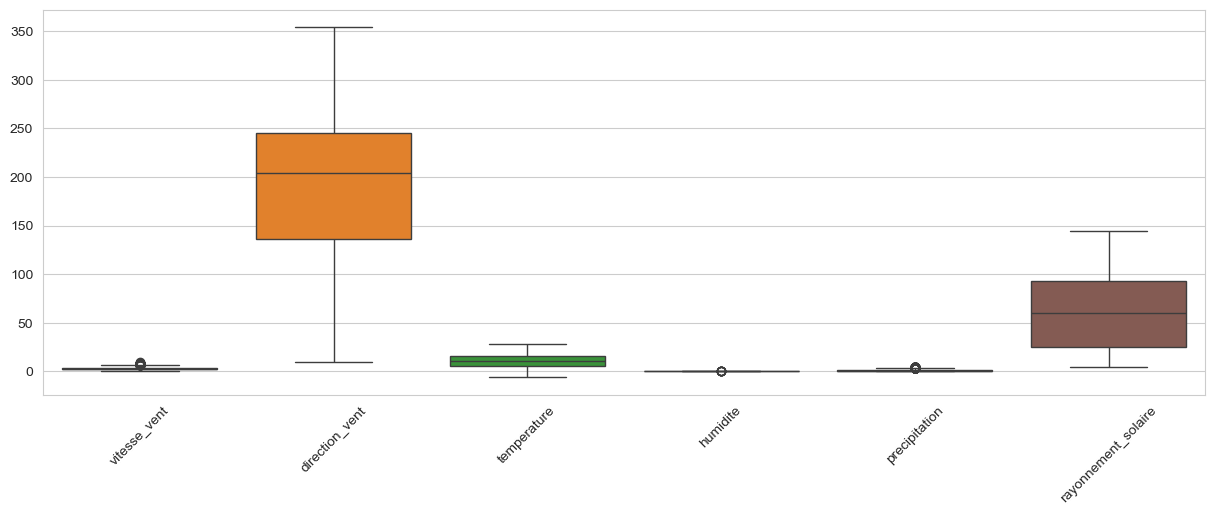

In [37]:
#voir les valeurs manquantes avec le boxplot
plt.figure(figsize=(15, 5))
sns.boxplot(data = df)
plt.xticks(rotation = 45)
plt.show()

In [38]:
#analyse des valeurs des donnees
df.describe()

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
count,3517.000000,3517.000000,3517.000000,3517.000000,3517.000000,3517.000000
mean,2.934245,187.466088,10.755798,0.677751,0.814677,61.915395
std,1.347727,78.266764,6.341789,0.070862,1.087392,39.040914
min,0.440000,10.120000,-5.880000,0.480000,0.000000,4.090000
25%,1.940000,136.620000,5.880000,0.630000,0.040000,24.850000
50%,2.680000,204.120000,10.850000,0.690000,0.260000,60.460000
75%,3.690000,245.060000,16.050000,0.730000,1.220000,92.810000
max,9.730000,354.190000,28.280000,0.800000,4.240000,144.460000


#

In [102]:
# nombre total des observations
df.shape


(3517, 6)

**Tracer des séries chronologiques**

Affichons le graphique de chaque variable

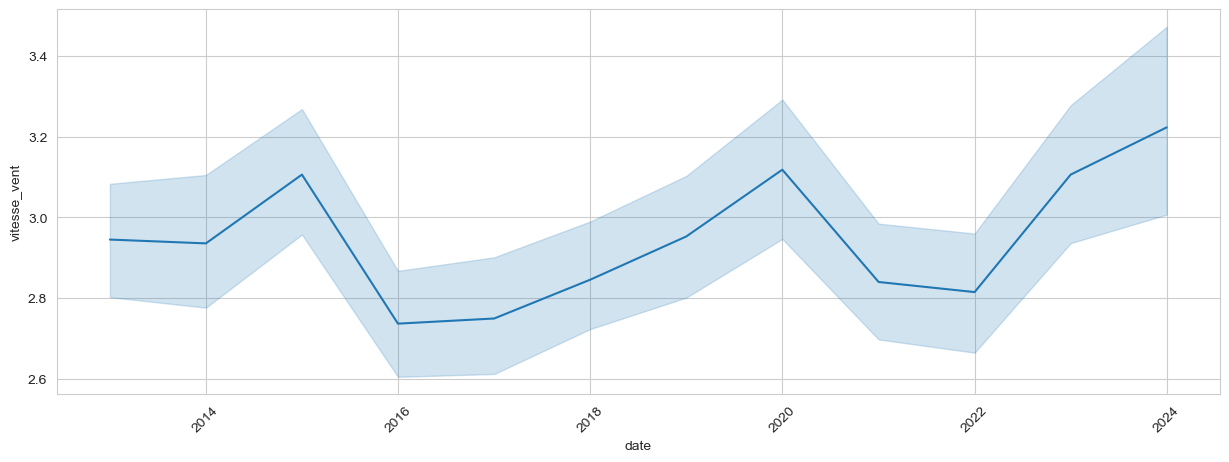

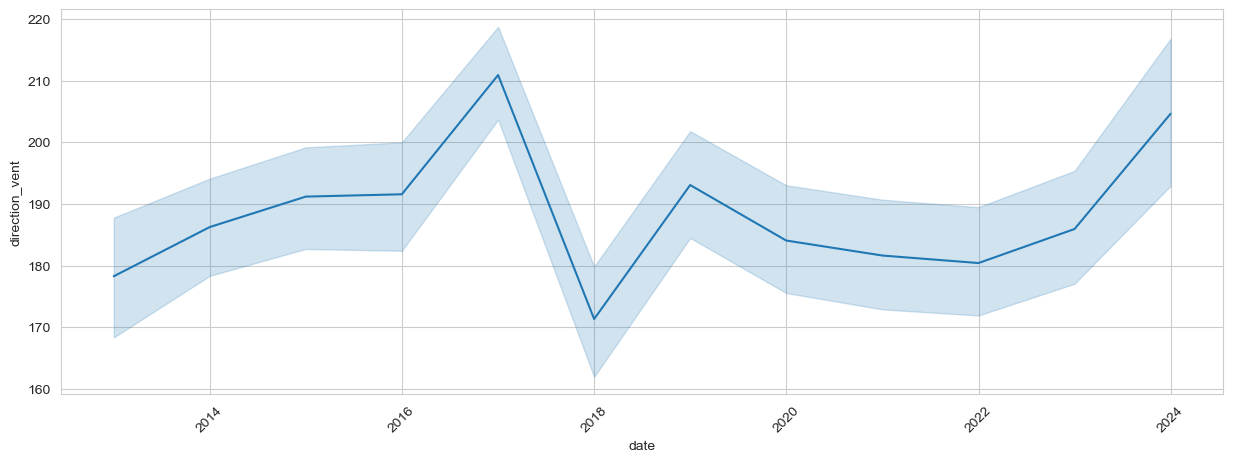

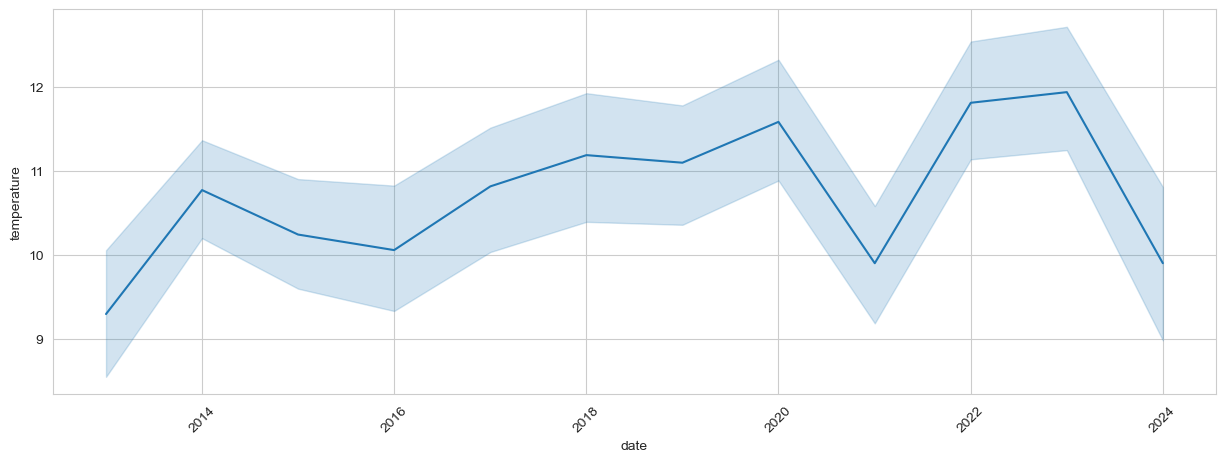

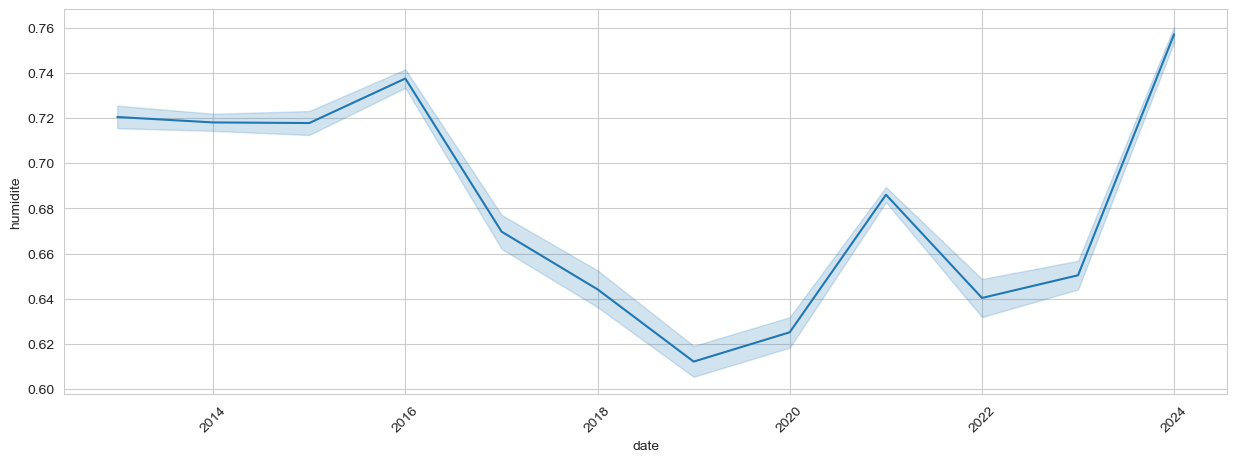

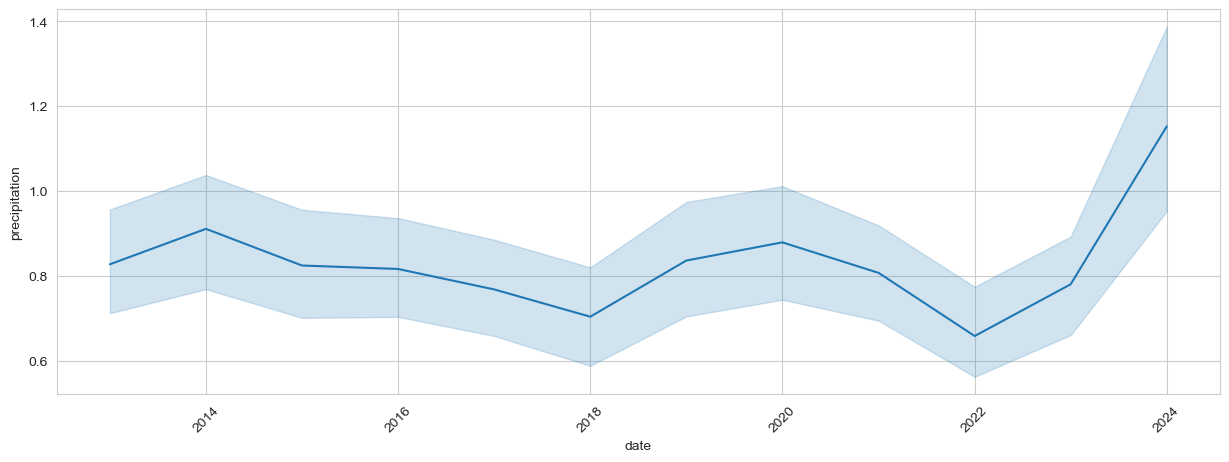

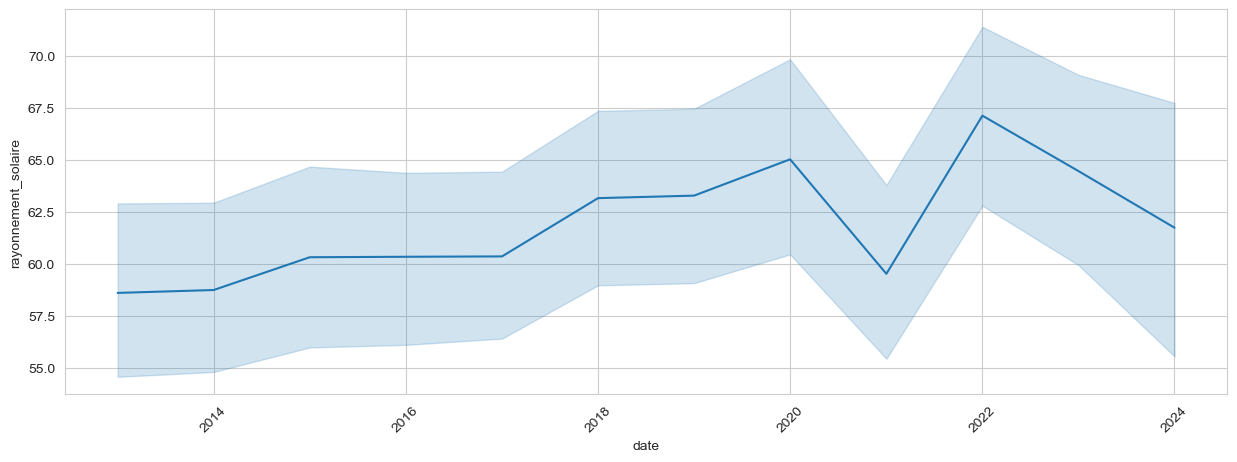

In [ ]:
# visualisation de tout les variables dans des figures differentes
for i in df.columns:
    plt.figure(figsize=(15, 5))
    sns.lineplot(data = df[i])
    plt.xticks(rotation = 45)
    plt.show()



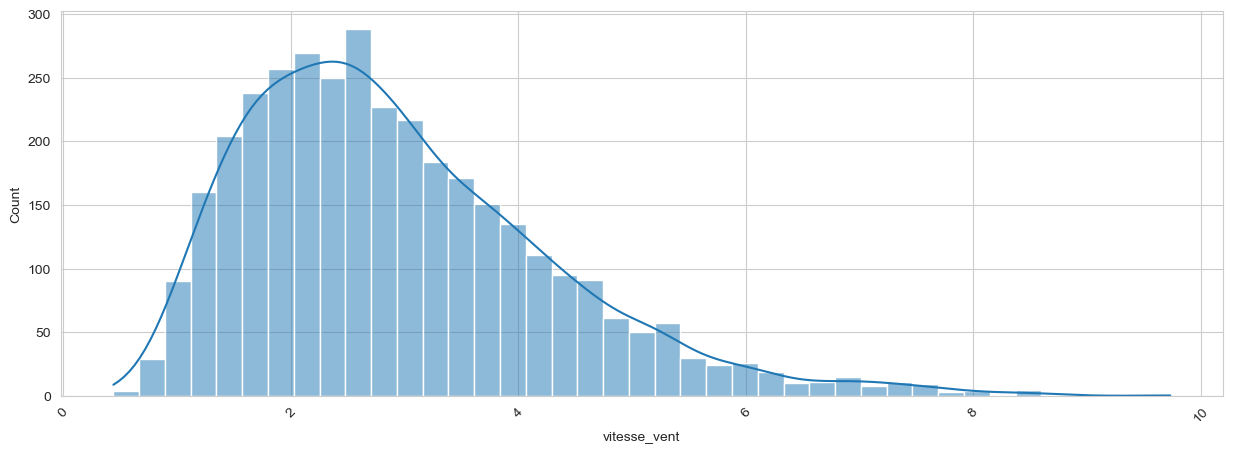

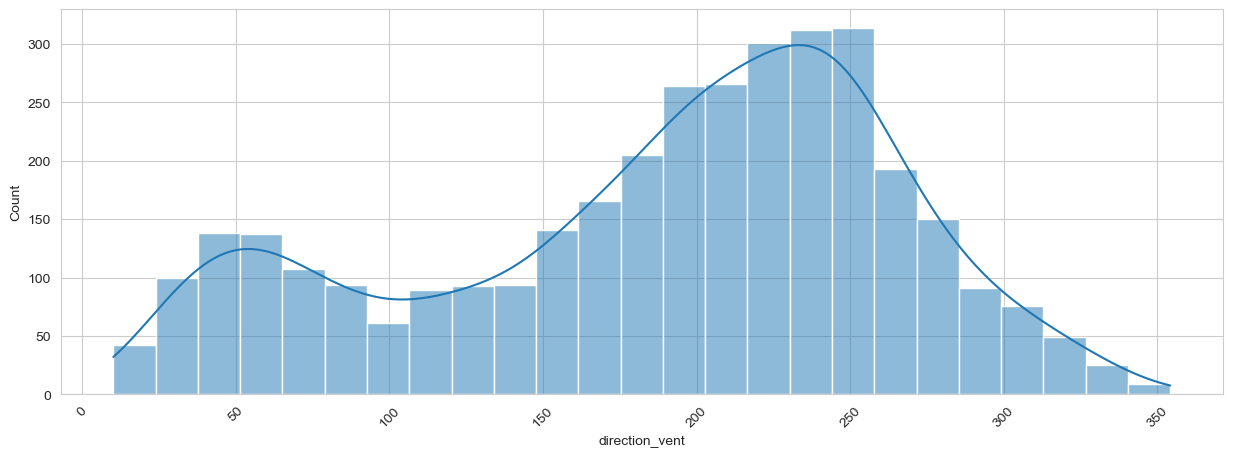

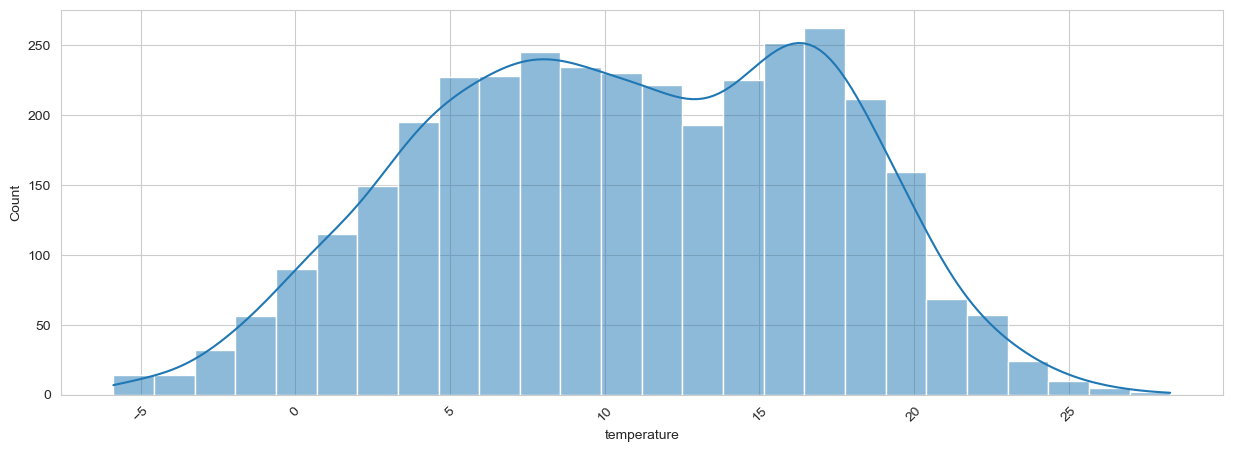

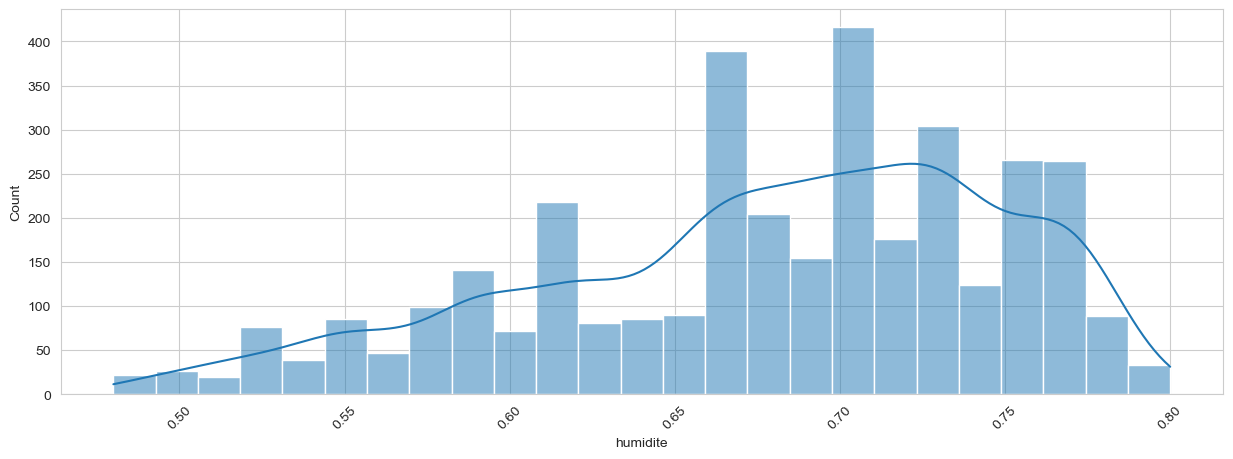

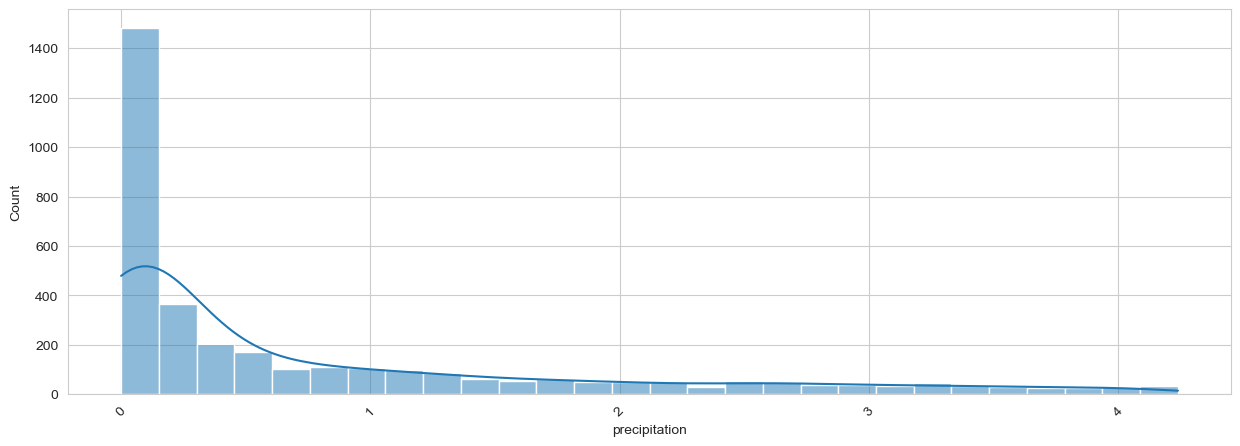

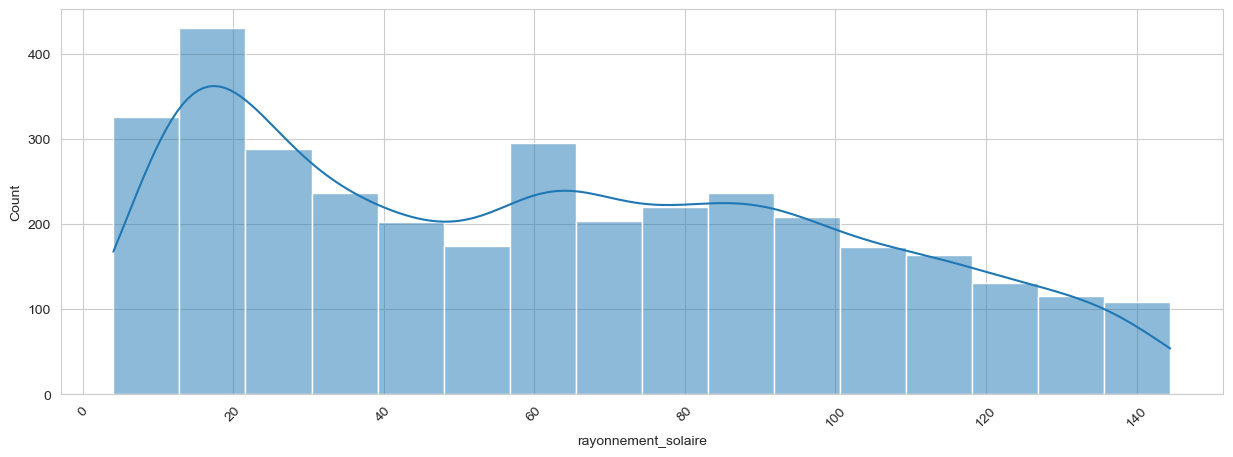

In [41]:
# affiche l'histogramme de tout les variables avec la courebe de densité
for i in df.columns:
    plt.figure(figsize=(15, 5))
    sns.histplot(df[i], kde = True)
    plt.xticks(rotation = 45)
    plt.show()
    

### interprétation des résultats:
Toute les variables sont asymétrique vers la droite sauf la variable humidité qui est asymétrique vers la droite

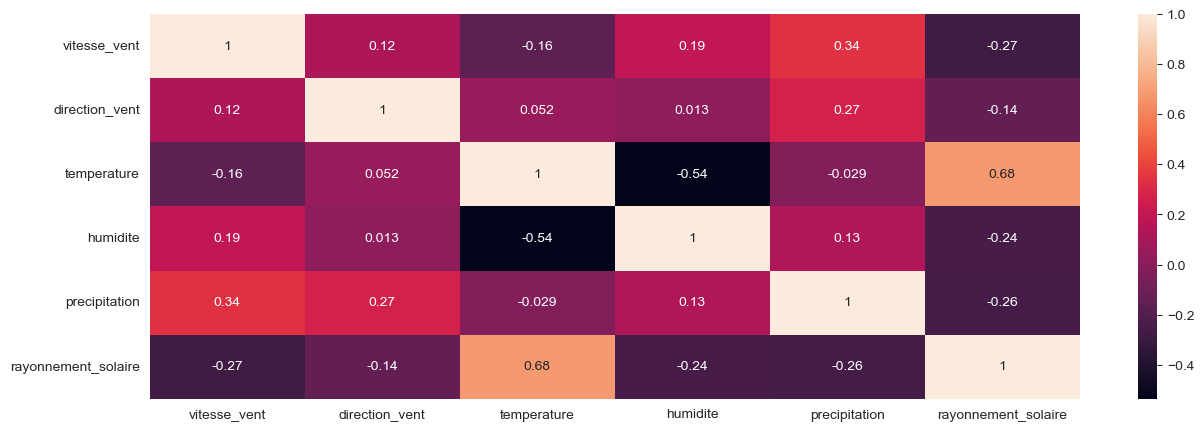

In [42]:
# afficher la matrice de correlation de tous les variables
plt.figure(figsize=(15, 5))
sns.heatmap(df.corr(), annot = True)
plt.show()


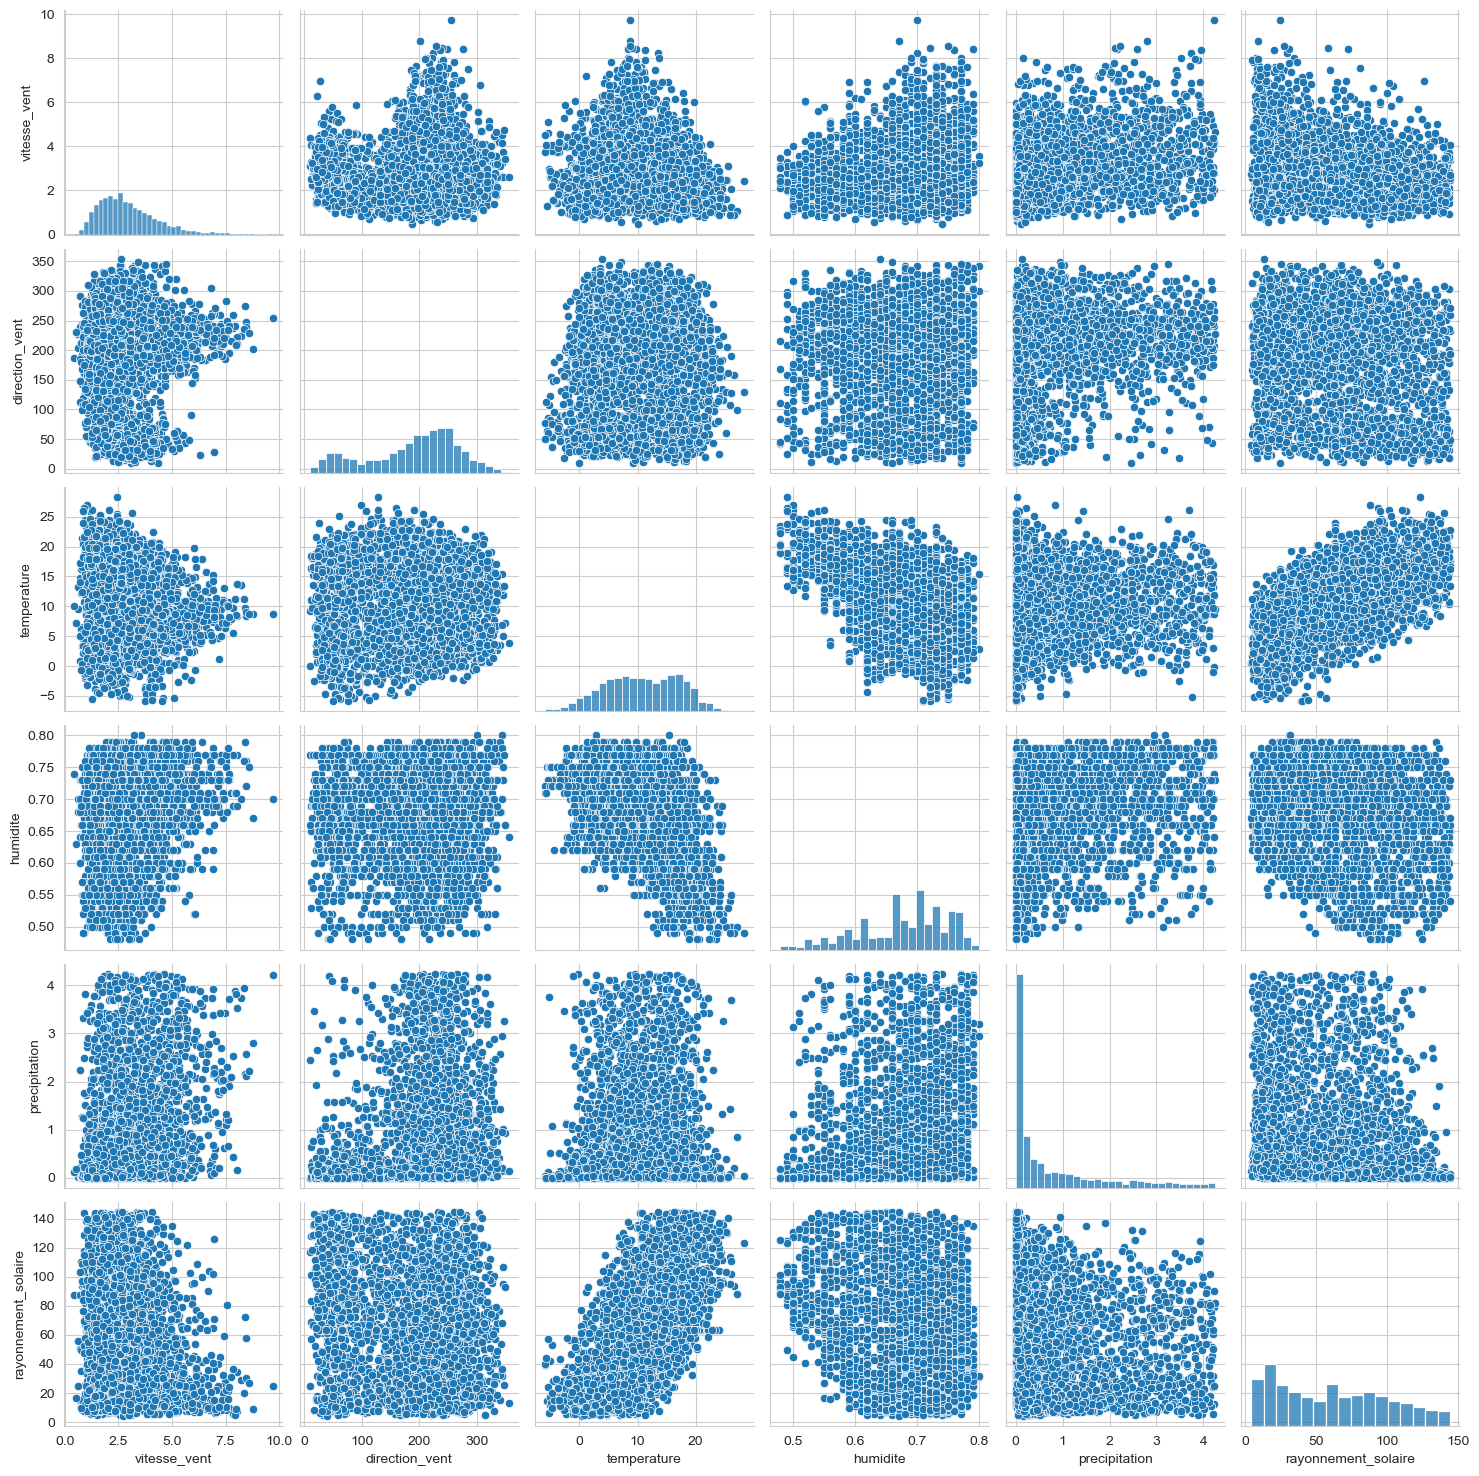

,vitesse_vent,direction_vent,temperature,humidite,precipitation,rayonnement_solaire
vitesse_vent,1.000000,0.122762,-0.160595,0.191630,0.337533,-0.274570
direction_vent,0.122762,1.000000,0.052161,0.012966,0.269997,-0.141548
temperature,-0.160595,0.052161,1.000000,-0.535623,-0.029250,0.681427
humidite,0.191630,0.012966,-0.535623,1.000000,0.132726,-0.244141
precipitation,0.337533,0.269997,-0.029250,0.132726,1.000000,-0.258264
rayonnement_solaire,-0.274570,-0.141548,0.681427,-0.244141,-0.258264,1.000000


In [48]:
# Tracer des graphiques de dispersion pour chaque paire de variables
sns.pairplot(df)
plt.show()
# Calculer les coefficients de corrélation
df.corr()


### interprétation des résultats:
Toutes les variables quantitatives sont faiblement corréle mais à l'exeption de la temparature et le rayonnement solaire qui sont fortement correlé car la valeur est > 0,5 

# Renommage des colonnes
Aucune colonnes ne doit être modifier car les colonnes ont déja des valeurs significative

## Gérer les valeurs manquantes
Lorsqu'il s'agit de données de séries chronologiques, il est judicieux d'utiliser une interpolation linéaire pour remplacer les valeurs manquantes. le code suivant nous montre quue nous avons aucune valeurs manquantes

In [35]:
df.isnull().sum()

vitesse_vent           0
direction_vent         0
temperature            0
humidite               0
precipitation          0
rayonnement_solaire    0
dtype: int64

## Divisez l'ensemble de données en données d'entraînement et données de test
Dans ce projet, j'ai défini les 80 % premiers des données comme données d'entraînement et les 20 % restants comme données de test. J'entraîne le modèle avec les données d'entraînement et valide ses performances avec les données de test.

In [72]:
# selectionner la variable "précipitation" pour la prédiction
# Split train data to X and y
X_train = df.drop('precipitation', axis = 1)
y_train = df.loc[:,['precipitation']]

# Split test data to X and y
X_test = df.drop('precipitation', axis = 1)
y_test = df.loc[:,['precipitation']]

# diviser les données en 70% pour l'entrainement et 30% pour le test
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.3, random_state = 42)


#afficher les dimensions de X_train, y_train, X_test et y_test ligne par ligne
X_train.shape, y_train.shape, X_test.shape, y_test.shape






((2461, 5), (2461, 1), (1056, 5), (1056, 1))

In [73]:
# Transform X_train, y_train, X_test and y_test

# Different scaler for input and output
scaler_x = MinMaxScaler(feature_range = (0,1))
scaler_y = MinMaxScaler(feature_range = (0,1))

# Fit the scaler using available training data
input_scaler = scaler_x.fit(X_train)
output_scaler = scaler_y.fit(y_train)

# Apply the scaler to training data
train_y_norm = output_scaler.transform(y_train)
train_x_norm = input_scaler.transform(X_train)

# Apply the scaler to test data
test_y_norm = output_scaler.transform(y_test)
test_x_norm = input_scaler.transform(X_test)




# Afficher les dimensions des ensembles de données
print(f'Taille des données d\'entraînement: {train_x_norm.shape}')
print(f'Taille des données d\'entraînement: {train_y_norm.shape}')
print(f'Taille des données de test: {test_x_norm.shape}')
print(f'Taille des données de test: {test_y_norm.shape}')

Taille des données d'entraînement: (2461, 5)
Taille des données d'entraînement: (2461, 1)
Taille des données de test: (1056, 5)
Taille des données de test: (1056, 1)


In [74]:
def create_dataset(data_x, data_y, time_step=1):
    X, Y = [], []
    for i in range(len(data_x) - time_step - 1):
        a = data_x[i:(i + time_step), :]
        X.append(a)
        Y.append(data_y[i + time_step, :])
    return np.array(X), np.array(Y)

time_step = 10
X_train, y_train = create_dataset(train_x_norm, train_y_norm, time_step)
X_test, y_test = create_dataset(test_x_norm, test_y_norm, time_step)

print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2450, 10, 5)
y_train shape: (2450, 1)
X_test shape: (1045, 10, 5)
y_test shape: (1045, 1)


# Créer un modèle BiLSTM, LSTM et GRU
La première fonction, create_model_bilstm, crée un BDLSM et obtient le nombre d'unités (neurones) dans les couches cachées. La deuxième fonction, *create_model*, obtient deux entrées : le nombre d'unités dans les couches cachées et le nom du modèle (LSTM GRU et LSTM-GRU).

Par souci de simplicité, BiLSTM, LSTM ,LSTM-GRU et GRU ont 2 couches cachées comprenant 64 neurones et 1 neurone dans la couche de sortie.

Pour rendre les réseaux LSTM et GRU robustes aux changements, la fonction Dropout est utilisée. Dropout(0.3) supprime aléatoirement 30 % des unités du réseau. 
Pour éviter les erreur de overting et underfintin je vais utiliser une régularisation L2 dans mes couches

In [93]:
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.regularizers import l2

In [96]:
# Création du BiLSTM model
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dense
from keras.regularizers import l2

def create_model_bilstm(units):
    model = Sequential()
    
    # Première couche BiLSTM avec retour de séquences
    model.add(Bidirectional(LSTM(units=units, return_sequences=True), 
                            input_shape=(X_train.shape[1], X_train.shape[2])))
    
    # Deuxième couche BiLSTM avec régularisation L2 et activation sigmoid
    model.add(Bidirectional(LSTM(units=units, activation='sigmoid', kernel_regularizer=l2(0.01))))
    
    # Couche Dense finale pour la sortie
    model.add(Dense(1))
    
    # Compilation du modèle
    model.compile(loss='mse', optimizer='adam')
    
    return model

# Création du LSTM ou GRU model
def create_model(units, m):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, activation='sigmoid', input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.3))
    # Second layer of LSTM
    model.add(m (units = units, activation='sigmoid',kernel_regularizer=l2(0.01)))                 
    model.add(Dropout(0.3))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model
# Création du LSTM-GRU model
def create_model_hybride(units,units1, m,n):
    model = Sequential()
    # First layer of LSTM
    model.add(m (units = units, return_sequences = True, activation='sigmoid', input_shape = [X_train.shape[1], X_train.shape[2]]))
    model.add(Dropout(0.3))
    # Second layer of LSTM
    model.add(n (units = units1,activation='sigmoid',kernel_regularizer=l2(0.01)))                 
    model.add(Dropout(0.3))
    model.add(Dense(units = 1)) 
    #Compile model
    model.compile(loss='mse', optimizer='adam')
    return model

# BiLSTM
model_bilstm = create_model_bilstm(64)

# GRU and LSTM 
model_gru = create_model(64, GRU)
model_lstm = create_model(64, LSTM)

# LSTM-GRU
model_hybride = create_model_hybride(64,64, LSTM, GRU)


## Ajuster les modèles
J'entraîne le modèle avec des données d'entraînement pour 100 époques et batch_size = 32. Je fais en sorte que le modèle utilise 20 % des données d'entraînement comme données de validation. Il est important de définir shuffle = False car l'ordre des données est important dans notre projet.

Pour éviter le sur-apprentissage, je définis un arrêt précoce pour arrêter l'entraînement lorsque « val_loss » ne s'est pas amélioré après 10 époques (patience = 10). et un horloge d'arret losrque les fonction perte se stabilise pour

In [97]:
# Fit BiLSTM, LSTM LSTM-GRU and GRU
def fit_model(model):
    early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss',patience = 10,)

    # shuffle = False because the order of the data matters
    history = model.fit(X_train, y_train, epochs = 100, validation_split = 0.2,batch_size = 32, shuffle = False, callbacks = [early_stop])
    return history

history_bilstm = fit_model(model_bilstm)
history_lstm = fit_model(model_lstm)
history_gru = fit_model(model_gru)
history_hybride = fit_model(model_hybride)

Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 42s 88ms/step - loss: 2.4992 - val_loss: 0.6723
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 0.4664 - val_loss: 0.1444
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 0.1137 - val_loss: 0.0803
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0730 - val_loss: 0.0759
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0700 - val_loss: 0.0760
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - loss: 0.0699 - val_loss: 0.0760
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0700 - val_loss: 0.0757
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0701 - val_loss: 0.0752
Epoch 9/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0702 - val_loss: 0.0745
Epoch 10/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - loss: 0.0703 - val_loss: 0.0739
Epoch 11/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - loss: 0.0703 - val_loss: 0.0736
Epoch 12/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/ste

### fonction Perte de train  par rapport à la perte de validation

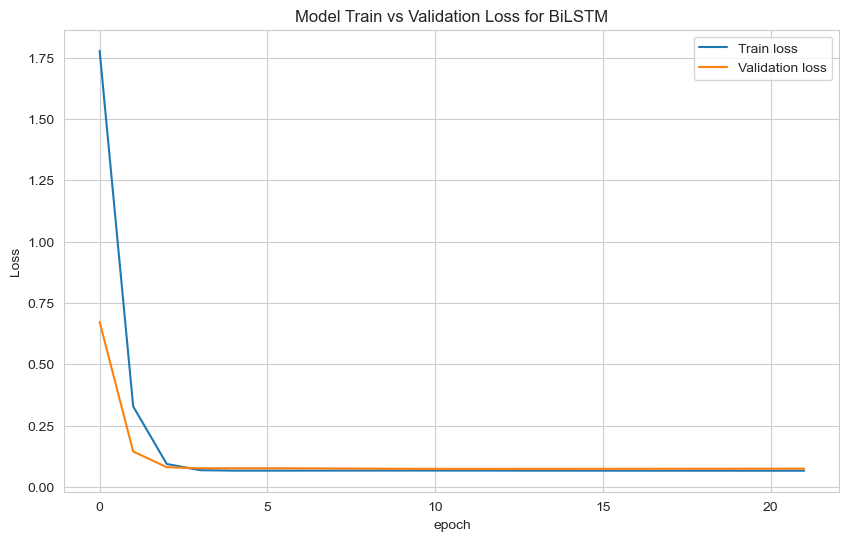

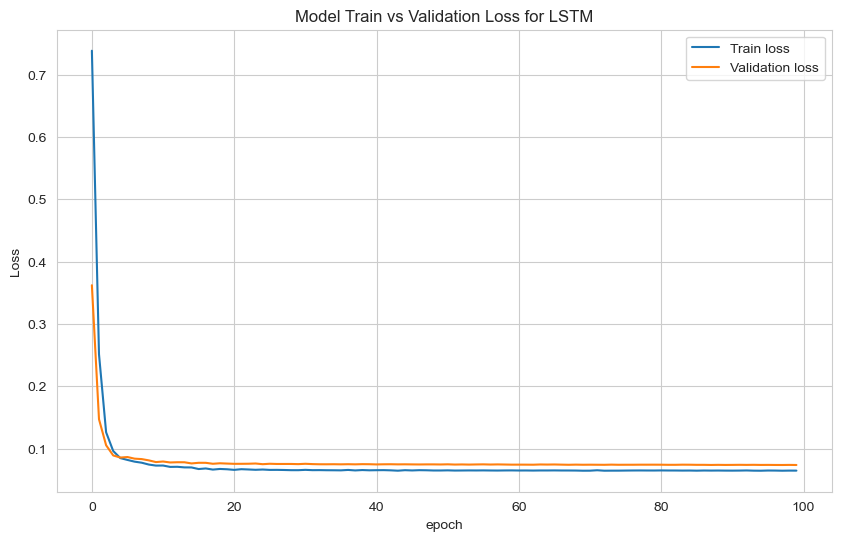

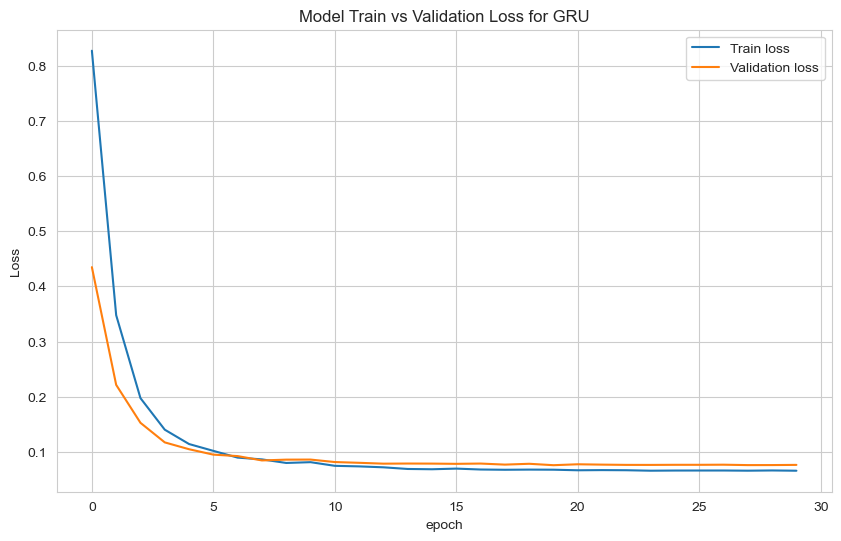

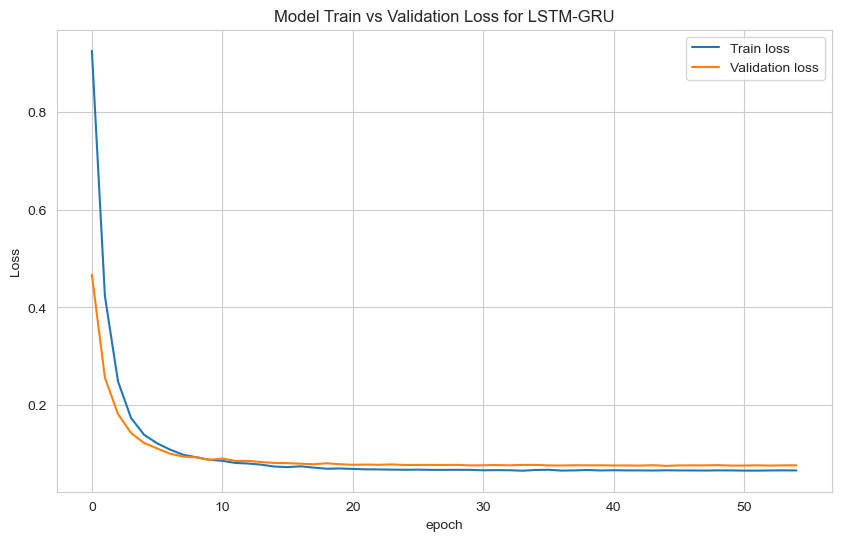

In [98]:
def plot_loss (history, model_name):
    plt.figure(figsize = (10, 6))
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Train vs Validation Loss for ' + model_name)
    plt.ylabel('Loss')
    plt.xlabel('epoch')
    plt.legend(['Train loss', 'Validation loss'], loc='upper right')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/loss_'+model_name+'.jpg', format='jpg', dpi=1000)

plot_loss (history_bilstm, 'BiLSTM')
plot_loss (history_lstm, 'LSTM')
plot_loss (history_gru, 'GRU')
plot_loss (history_hybride, 'LSTM-GRU')

## Variable cible inverse pour les données d'entraînement et de test
Après avoir construit le modèle, je dois retransformer la variable cible en espace de données d'origine pour les données d'entraînement et de test à l'aide de scaler_y.inverse_transform.

In [103]:
# Note that I have to use scaler_y
y_test = scaler_y.inverse_transform(y_test)
y_train = scaler_y.inverse_transform(y_train)

# Faire des prédictions en mes quatre modèle
Ici, je prédis les précipitations en utilisant mes quatre. Ensuite, je trace les données réel par rapport aux prédictions des 4 modèles.

In [106]:
def prediction(model):
    prediction = model.predict(X_test)
    prediction = scaler_y.inverse_transform(prediction)
    return prediction

prediction_bilstm = prediction(model_bilstm)
prediction_lstm = prediction(model_lstm)
prediction_gru = prediction(model_gru)
prediction_hybride = prediction(model_hybride)


33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [118]:
# Définir les dataframes
df_bilstm = pd.DataFrame()
df_lstm = pd.DataFrame()
df_gru = pd.DataFrame()
df_hybride = pd.DataFrame()

# Ajouter les dates, les valeurs réelles et prédites dans les dataframes respectifs
df_bilstm['Date'] = df.index[-len(prediction_bilstm):]
df_bilstm['Real'] = y_test.flatten()
df_bilstm['Predicted'] = prediction_bilstm.flatten()

df_lstm['Date'] = df.index[-len(prediction_lstm):]
df_lstm['Real'] = y_test.flatten()
df_lstm['Predicted'] = prediction_lstm.flatten()

df_gru['Date'] = df.index[-len(prediction_gru):]
df_gru['Real'] = y_test.flatten()
df_gru['Predicted'] = prediction_gru.flatten()

df_hybride['Date'] = df.index[-len(prediction_hybride):]
df_hybride['Real'] = y_test.flatten()
df_hybride['Predicted'] = prediction_hybride.flatten()

# Afficher les dataframes
print("BiLSTM Model Predictions:")
print(df_bilstm.head())

print("\nLSTM Model Predictions:")
print(df_lstm.head())

print("\nGRU Model Predictions:")
print(df_gru.head())

print("\nLSTM-GRU Model Predictions:")
print(df_hybride.head())

BiLSTM Model Predictions:
        Date  Real  Predicted
0 2020-01-01  0.06   0.694149
1 2021-01-01  0.04   0.694982
2 2021-01-01  0.58   0.694685
3 2021-01-01  0.75   0.694864
4 2021-01-01  0.03   0.693783

LSTM Model Predictions:
        Date  Real  Predicted
0 2020-01-01  0.06   0.737590
1 2021-01-01  0.04   0.737581
2 2021-01-01  0.58   0.737585
3 2021-01-01  0.75   0.737588
4 2021-01-01  0.03   0.737586

GRU Model Predictions:
        Date  Real  Predicted
0 2020-01-01  0.06   0.599745
1 2021-01-01  0.04   0.599726
2 2021-01-01  0.58   0.599725
3 2021-01-01  0.75   0.599736
4 2021-01-01  0.03   0.599726

LSTM-GRU Model Predictions:
        Date  Real  Predicted
0 2020-01-01  0.06   0.605091
1 2021-01-01  0.04   0.605064
2 2021-01-01  0.58   0.605078
3 2021-01-01  0.75   0.605069
4 2021-01-01  0.03   0.605073


## Plot des données réel et données prédicte


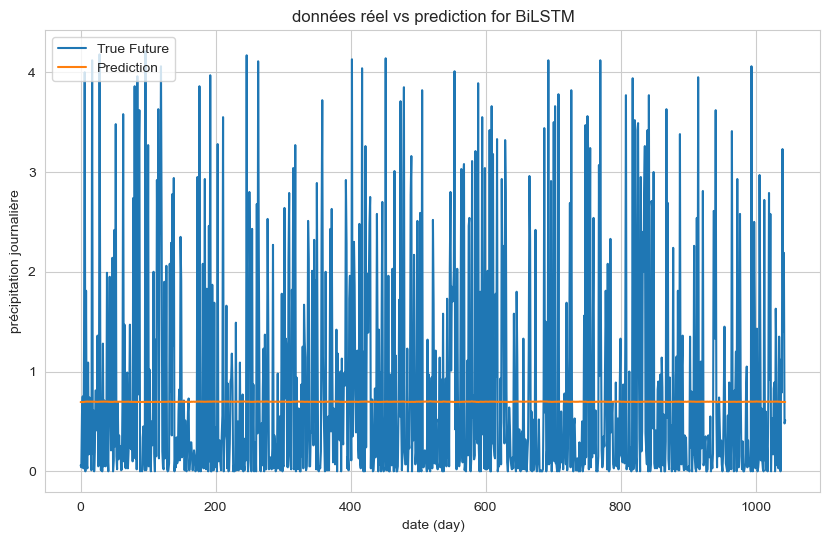

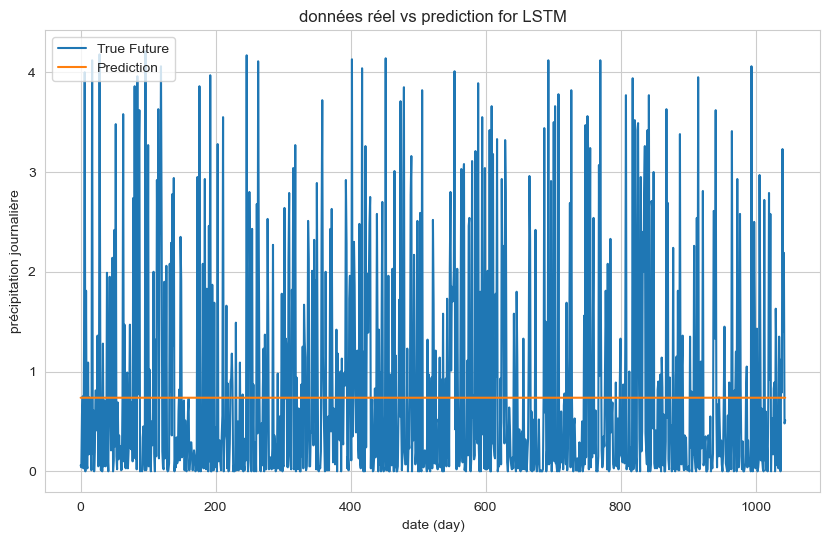

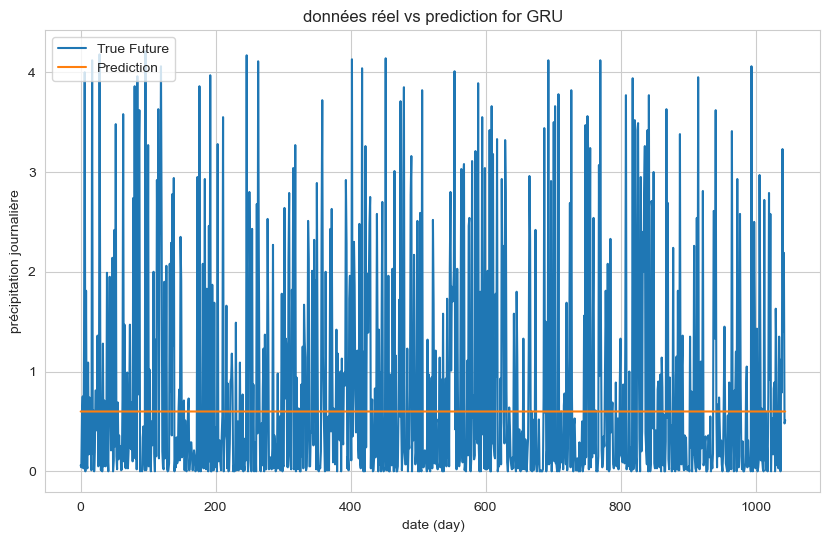

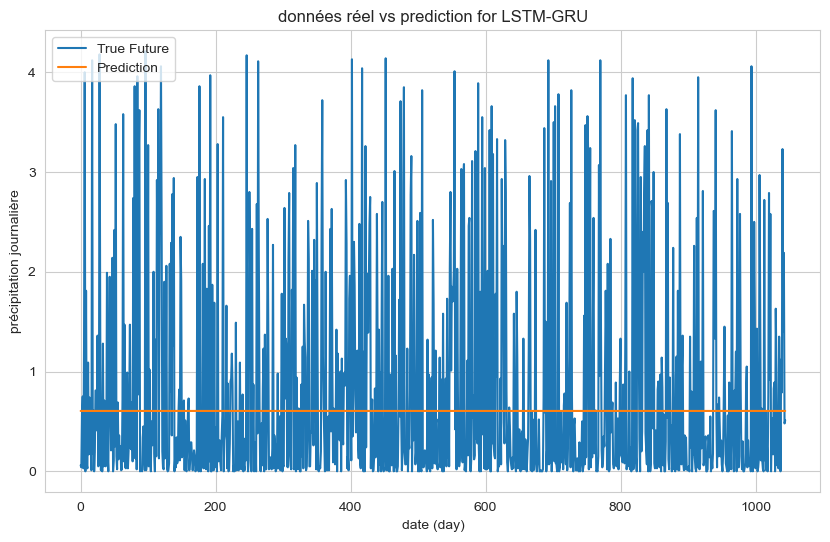

In [116]:
def plot_future(prediction, model_name, y_test):
    
    plt.figure(figsize=(10, 6))
    
    range_future = len(prediction.flatten())

    plt.plot(np.arange(range_future), np.array(y_test), label='True Future')
    plt.plot(np.arange(range_future), np.array(prediction),label='Prediction')

    plt.title('données réel vs prediction for ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('date (day)')
    plt.ylabel('précipitation journalière')
    #plt.savefig('C:/Users/nious/Documents/Medium/LSTM&GRU/predic_'+model_name+'.jpg', format='jpg', dpi=1000)
    
    
plot_future(prediction_bilstm, 'BiLSTM', y_test)
plot_future(prediction_lstm, 'LSTM', y_test)
plot_future(prediction_gru, 'GRU', y_test)
plot_future(prediction_hybride, 'LSTM-GRU', y_test)

# Calcul des métriques RSME, MAE et MSE

In [124]:
# Define a function to calculate MAE and RMSE
def evaluate_prediction(predictions, actual, model_name):
    errors = predictions - actual
    mse = np.square(errors).mean()
    rmse = np.sqrt(mse)
    mae = np.abs(errors).mean()
    # calculer le r2 
    r2 = 1 - (np.sum(errors**2) / np.sum((actual - np.mean(actual))**2))
    # calculer la correlation
    corr = np.corrcoef(predictions.flatten(), actual.flatten())[0,1]
    print(model_name + ':')
    print('Mean Absolute Error: {:.4f}'.format(mae))
    print('Root Mean Square Error: {:.4f}'.format(rmse))
    print('Root Mean Square Error: {:.4f}'.format(mse))
    print('R2: {:.4f}'.format(r2))
    print('Corrélation: {:.4f}'.format(corr))
    print('')


evaluate_prediction(prediction_bilstm, y_test, 'Bidirectional LSTM')
evaluate_prediction(prediction_lstm, y_test, 'LSTM')
evaluate_prediction(prediction_gru, y_test, 'GRU')
evaluate_prediction(prediction_hybride, y_test, 'LSTM-GRU')

Bidirectional LSTM:
Mean Absolute Error: 0.8010
Root Mean Square Error: 1.0793
Root Mean Square Error: 1.1649
R2: -0.0127
Corrélation: 0.0052

LSTM:
Mean Absolute Error: 0.8127
Root Mean Square Error: 1.0755
Root Mean Square Error: 1.1568
R2: -0.0057
Corrélation: 0.0022

GRU:
Mean Absolute Error: 0.7758
Root Mean Square Error: 1.0945
Root Mean Square Error: 1.1980
R2: -0.0415
Corrélation: 0.0840

LSTM-GRU:
Mean Absolute Error: 0.7771
Root Mean Square Error: 1.0935
Root Mean Square Error: 1.1957
R2: -0.0395
Corrélation: 0.0083



Les résultats montrent que le **GRU** a les meilleures performances par rapport au BiLSTM, LSTM et au LSTM-GRU. J'utilise donc le modèle GU pour prévoir la precipitation dans 1 an

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
GRU Model Predictions for the next 2 years:
         Date  Predicted
0  2024-01-01   0.599746
1  2024-01-02   0.599736
2  2024-01-03   0.599738
3  2024-01-04   0.599751
4  2024-01-05   0.599768
5  2024-01-06   0.599778
6  2024-01-07   0.599776
7  2024-01-08   0.599772
8  2024-01-09   0.599762
9  2024-01-10   0.599760
10 2024-01-11   0.599755
11 2024-01-12   0.599769
12 2024-01-13   0.599763
13 2024-01-14   0.599758
14 2024-01-15   0.599761
15 2024-01-16   0.599774
16 2024-01-17   0.599786
17 2024-01-18   0.599768
18 2024-01-19   0.599746
19 2024-01-20   0.599752



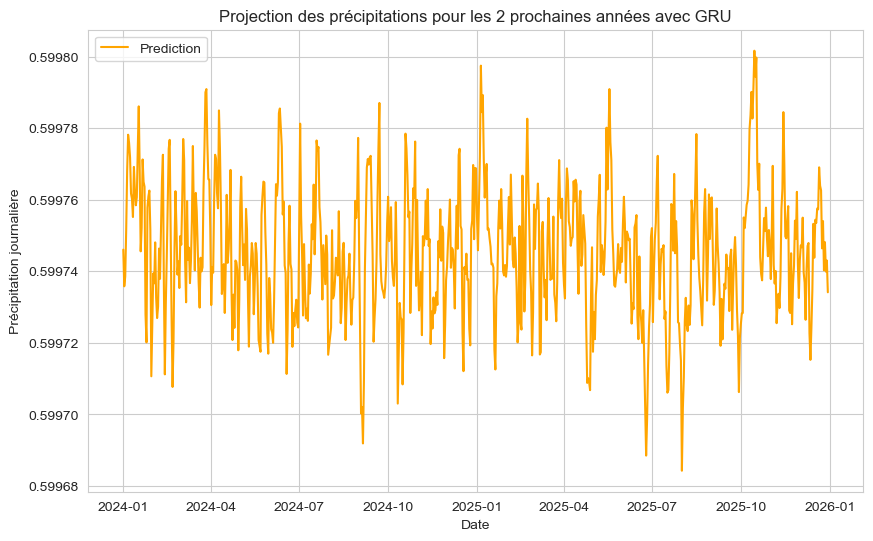

In [166]:
def prediction_future_2_years(model, X_test, y_test, model_name, days=730):
    # Prédire les 2 prochaines années (730 jours)
    prediction = model.predict(X_test[-days:])
    prediction = scaler_y.inverse_transform(prediction)
    
    # Créer un dataframe pour stocker les prédictions et les donneées réelles
    
    df_future = pd.DataFrame()
    df_future['Date'] = pd.date_range(start=df.index[-1], periods=days, freq='D')
    df_future['Predicted'] = prediction.flatten()
    
    # Afficher les prédictions
    print(model_name + ' Model Predictions for the next 2 years:')
    print(df_future.head(20))
    print('')
    
    # Plot future predictions avec une autre couleur pour les 2 prochaines années
    plt.figure(figsize=(10, 6))
    plt.plot(df_future['Date'], df_future['Predicted'], label='Prediction', color='orange')
    plt.title('Projection des précipitations pour les 2 prochaines années avec ' + model_name)
    plt.legend(loc='upper left')
    plt.xlabel('Date')
    plt.ylabel('Précipitation journalière')
    plt.show()

# Afficher les prédictions pour les 2 prochaines années
prediction_future_2_years(model_gru, X_test, y_test, 'GRU')